In [ ]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.model_selection import train_test_split
import time

2023-06-25 05:01:12.107827: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 05:01:12.339840: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-06-25 05:01:12.890457: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/zackrocks/anaconda3/lib/:/home/zackrocks/.local/lib/python3.10/site-packages/nvidia/cudnn/lib:/home/zackrocks/anaconda3/lib/:/home/zackrocks/.local/lib/python3.10/site-packages/nvidia/cudnn/lib:/home/zackr

In [ ]:
dm=np.load('/home/zackrocks/Desktop/cyclone/testing/TCIR-ATLN_EPAC_WPAC.npy')
df=pd.read_csv('/home/zackrocks/Desktop/cyclone/testing/TCIR-ATLN_EPAC_WPAC.csv')

In [ ]:
data=np.array(dm[:,63:138,63:138,0:])

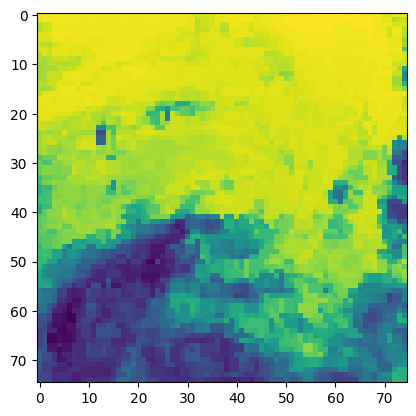

In [ ]:
plt.imshow(data[1,:,:,0])

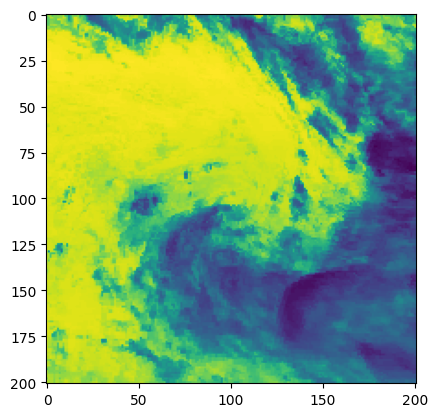

In [ ]:
plt.imshow(dm[1,:,:,0])

In [ ]:
X = data
y = df['Vmax'].values[:]

X[np.isnan(X)] = 0
X[X > 1000] = 0

In [ ]:
#Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
# Define the input shape
input_shape = (75, 75, 2)

In [ ]:
X_train.shape

(42642, 75, 75, 2)

In [ ]:
# Define the model
model = tf.keras.models.Sequential([

    # Convolutional layer 1
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),

    # Convolutional layer 2
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),

    # Convolutional layer 3
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),

     # Convolutional layer 4
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2)),

    # Flatten the output from the convolutional layers
    tf.keras.layers.Flatten(),

    # Fully connected layers for regression output
    tf.keras.layers.Dense(units=2048, activation='relu'),
    tf.keras.layers.Dense(units=1024, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
])



2023-06-25 05:01:27.725041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-25 05:01:27.832078: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-25 05:01:27.832235: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-25 05:01:27.833136: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
Adam = tf.keras.optimizers.Adam()

# Compile the model with Mean Squared Error loss and Adam optimizer
model.compile(loss='mse', optimizer=Adam, metrics=['mae'])

# Print the summary of the model
model.summary()

# Define early stD:/cyclone/model/opping callback
early_stop = EarlyStopping(monitor='val_loss', patience=7)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 73, 73, 8)         152       
                                                                 
 average_pooling2d (AverageP  (None, 36, 36, 8)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 34, 34, 16)        1168      
                                                                 
 average_pooling2d_1 (Averag  (None, 17, 17, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 32)        4640      
                                                                 
 average_pooling2d_2 (Averag  (None, 7, 7, 32)         0

In [ ]:
#Training Model
model.fit(X_train,y_train ,epochs=100,validation_data=(X_test,y_test),verbose=1, callbacks=[early_stop])

2023-06-25 05:01:28.592363: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1918890000 exceeds 10% of free system memory.
2023-06-25 05:01:29.802102: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1918890000 exceeds 10% of free system memory.


Epoch 1/100


2023-06-25 05:01:31.871949: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8600
2023-06-25 05:01:32.759785: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-25 05:01:32.760290: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-25 05:01:32.760302: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-06-25 05:01:32.760784: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-06-25 05:01:32.760820: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-06-25 05:01:32.816434: I tensorflow/stream_executor/cuda/c

1333/1333 [==============================] - ETA: 0s - loss: 426.6625 - mae: 15.2724

2023-06-25 05:01:37.659255: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 213255000 exceeds 10% of free system memory.
2023-06-25 05:01:37.809090: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 213255000 exceeds 10% of free system memory.


1333/1333 [==============================] - 8s 4ms/step - loss: 426.6625 - mae: 15.2724 - val_loss: 453.6524 - val_mae: 15.1496
Epoch 2/100
1333/1333 [==============================] - 5s 3ms/step - loss: 291.8549 - mae: 12.7169 - val_loss: 252.6120 - val_mae: 11.9687
Epoch 3/100
1333/1333 [==============================] - 5s 3ms/step - loss: 241.7029 - mae: 11.5847 - val_loss: 251.3134 - val_mae: 11.3396
Epoch 4/100
1333/1333 [==============================] - 5s 3ms/step - loss: 222.4305 - mae: 11.0965 - val_loss: 201.9324 - val_mae: 10.7181
Epoch 5/100
1333/1333 [==============================] - 5s 3ms/step - loss: 205.9639 - mae: 10.7067 - val_loss: 196.8819 - val_mae: 10.2484
Epoch 6/100
1333/1333 [==============================] - 5s 3ms/step - loss: 195.4093 - mae: 10.4044 - val_loss: 235.9081 - val_mae: 11.9625
Epoch 7/100
1333/1333 [==============================] - 5s 3ms/step - loss: 188.5096 - mae: 10.2608 - val_loss: 181.8969 - val_mae: 9.9973
Epoch 8/100
1333/1333 [===

In [ ]:
#Saving the model
filename="TCINET"
model.save("/home/zackrocks/Desktop/cyclone/model"+filename+".h5",save_format='h5')

In [ ]:
y_pred=model.predict(X_test)
y_true=y_test

 47/149 [========>.....................] - ETA: 0s

2023-06-25 05:03:43.336936: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 213255000 exceeds 10% of free system memory.


149/149 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate evaluation metrics
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)

Mean Squared Error (MSE): 183.27454402114884
Root Mean Squared Error (RMSE): 13.537892894433345
Mean Absolute Error (MAE): 9.883202258381921
R-squared (R2) Score: 0.775558312067194


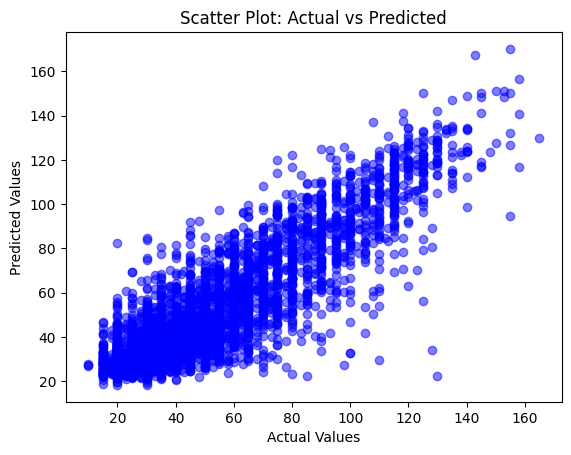

: 

In [ ]:
# Scatter plot
plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Actual vs Predicted')
plt.show()